# Exploratory Data Analysis : Haberman's Survival

To classify/predict a patient survival who had undergone surgery for breast cancer.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("haberman.csv")

In [8]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [9]:
df.columns=["Age", "Operation_year", "Axillary_lymph_node", "Survival_status"] #here we have changed column name for readability

In [10]:
df.head()

,Age,Operation_year,Axillary_lymph_node,Survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [11]:
df.shape # to check number of rows and columns 

(305, 4)

In [12]:
df.isnull().sum() # To check null values in data

Age                    0
Operation_year         0
Axillary_lymph_node    0
Survival_status        0
dtype: int64

Here we can see that there are 305 rows and 4 columns.

In [13]:
df.info() # To know about the data summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                    305 non-null int64
Operation_year         305 non-null int64
Axillary_lymph_node    305 non-null int64
Survival_status        305 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


Here we can see that
Age,Operation_year,Axillary_lymph_node,survival status column do not have any null value and their data type is integer.

In [14]:
df.describe().transpose() # for statistics summary of data set

,count,mean,std,min,25%,50%,75%,max
Age,305.0,52.531148,10.744024,30.0,44.0,52.0,61.0,83.0
Operation_year,305.0,62.849180,3.254078,58.0,60.0,63.0,66.0,69.0
Axillary_lymph_node,305.0,4.036066,7.199370,0.0,0.0,1.0,4.0,52.0
Survival_status,305.0,1.265574,0.442364,1.0,1.0,1.0,2.0,2.0


There are total 305 patients. Mean age of patients is 52.53. Minimum age of the patient is 30 and max age of the patient is 83.
25% of people have age less than 44 years and 75% of the people have age more than 61 years.

Minimum Auxillary lymph node in patients is 0 and maximum auxillary lymph node in patients in 52. 
75% of the people out of 305 have auxillary lymph node more than 4.

In [15]:
df["Age"].unique

<bound method Series.unique of 0      30
1      30
2      31
3      31
4      33
       ..
300    75
301    76
302    77
303    78
304    83
Name: Age, Length: 305, dtype: int64>

In [16]:
df["Operation_year"].unique()

array([62, 65, 59, 58, 60, 66, 61, 67, 64, 63, 69, 68], dtype=int64)

In [17]:
df["Axillary_lymph_node"].unique()

array([ 3,  0,  2,  4, 10,  9, 30,  1,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

In [18]:
df["Survival_status"].unique()

array([1, 2], dtype=int64)

Here the Target column is survival as we have to predict a patient survival who had undergone surgery for breast cancer.
It has numerical value 1 and 2. So, we will convert it to categorical column with values yes and no.

1 = the patient who survived    
2 = the patient who died

In [19]:
df['Survival_status'] = df['Survival_status'].map({1:'yes', 2:'no'})

In [20]:
df["Survival_status"].value_counts()

yes    224
no      81
Name: Survival_status, dtype: int64

We can see that 224 patients survived and 81 patients died out of 305 patients.

# Univariate Analysis

# Analysis for Age 

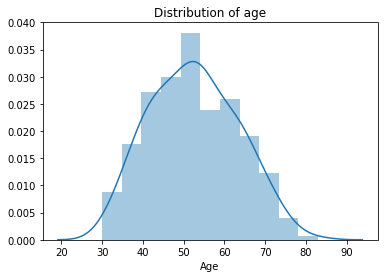

In [21]:
sns.distplot(df["Age"])
plt.title("Distribution of age")
plt.show()

Here we can see that age of patients is normally distributed with peak at 50 years.

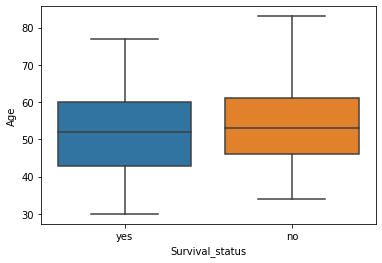

In [22]:
sns.boxplot(x ="Survival_status",y ="Age", data=df)
plt.show()

1. Here we can see that patients who died have median value of age slightly more than that of people who survived.

2. People who survived have minimum age around 50 and max age around 75.

3. people who died have minimum age around 32 and maximum age above 80 years.

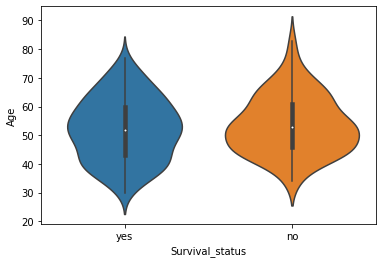

In [23]:
sns.violinplot(x ="Survival_status",y ="Age", data=df)
plt.show()

1. people who survived have minimum age around 50 and max age around 75.

2. People who died have minimum age around 32 and maximum age above 80 years.


# Analysis for Operation_year

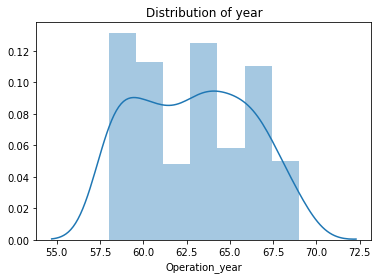

In [24]:
sns.distplot(df["Operation_year"])
plt.title("Distribution of year")
plt.show()

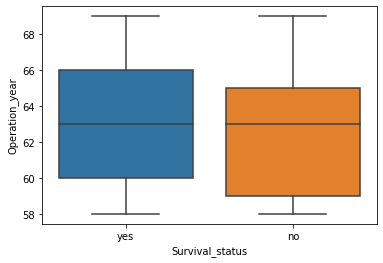

In [25]:
sns.boxplot(x ="Survival_status",y ="Operation_year", data=df)
plt.show()

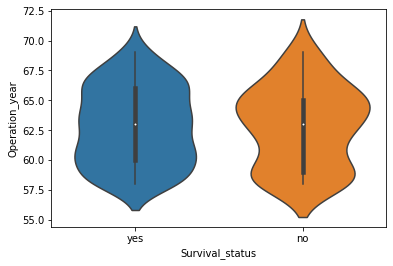

In [26]:
sns.violinplot(x ="Survival_status",y ="Operation_year", data=df)
plt.show()

# Analysis for Axillary lymph node

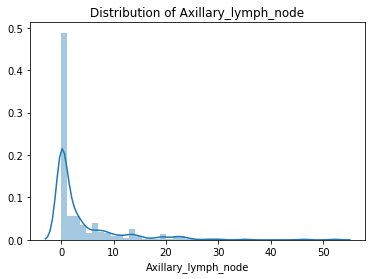

In [27]:
sns.distplot(df["Axillary_lymph_node"])
plt.title("Distribution of Axillary_lymph_node")
plt.show()

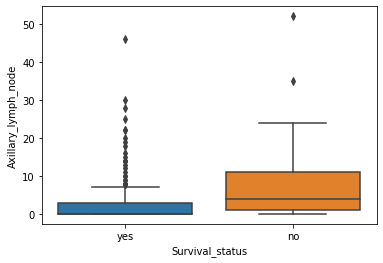

In [28]:
sns.boxplot(x ="Survival_status",y ="Axillary_lymph_node", data=df)
plt.show()

Axillary lymph node have outliers value above maximum value in people who survived.<br>
Axillary lymph node have outliers value above maximum value in people who died.<br>
people who survived have maximum Axillary_lymph_node around 45.<br>
people who died have maximum Axillary_lymph_node more than 50.

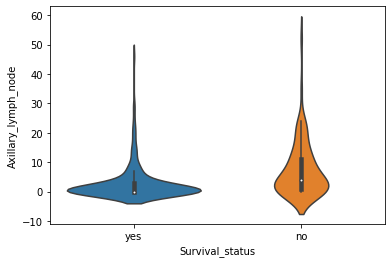

In [29]:
sns.violinplot(x ="Survival_status",y ="Axillary_lymph_node", data=df)
plt.show()

# Analysis for survival

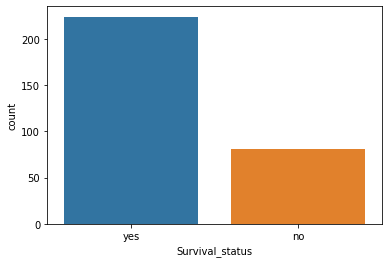

yes    224
no      81
Name: Survival_status, dtype: int64

In [30]:
sns.countplot(df["Survival_status"])
plt.show()
df["Survival_status"].value_counts()

Out of 305 people, 224 people survived and 81 people died.

# Analysis of Age and Axillary lymph node

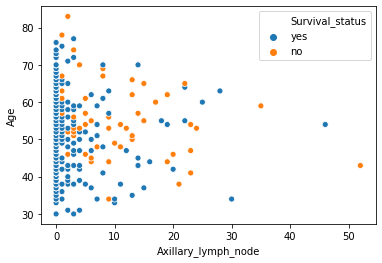

In [31]:
sns.scatterplot(x=df["Axillary_lymph_node"],y=df["Age"],hue=df["Survival_status"])
plt.show()

The people who survived have data points more concentrated along zero for axil_nodes.<br>
The people who died have more spread along axil_node axis.

# Multivariate Analysis

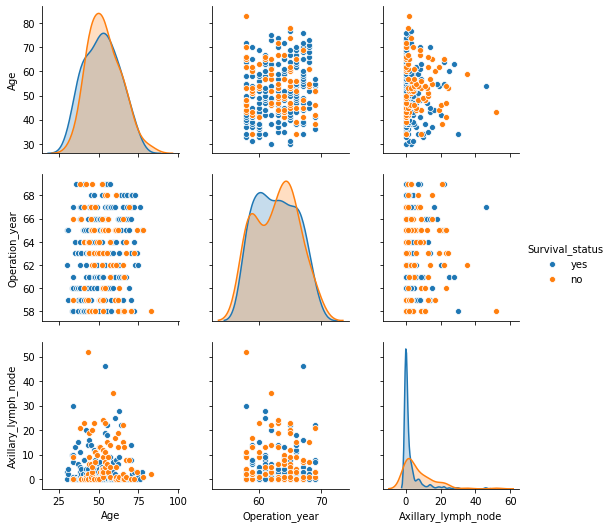

In [32]:
sns.pairplot(df, hue="Survival_status")
plt.show()

In [33]:
corelation=df.corr()

In [34]:
corelation

,Age,Operation_year,Axillary_lymph_node
Age,1.000000,0.092623,-0.066548
Operation_year,0.092623,1.000000,-0.003277
Axillary_lymph_node,-0.066548,-0.003277,1.000000


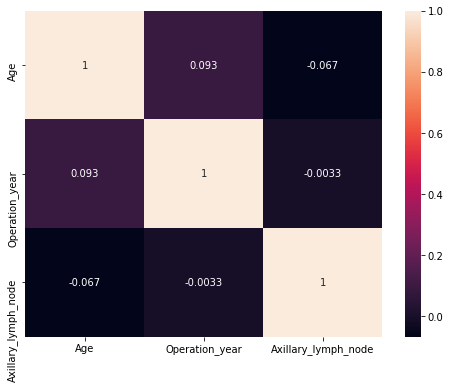

In [36]:
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(corelation,annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

# Statistical Test

# Survival and Age - T Test Independent 

In [79]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Survival_status']= label_encoder.fit_transform(df['Survival_status']) 
df['Survival_status'].value_counts()

1    224
0     81
Name: Survival_status, dtype: int64

In [80]:
from scipy.stats import ttest_ind
a=df[df["Survival_status"]==0]["Age"]
b=df[df["Survival_status"]==1]["Age"]
ttest_ind(a, b)

Ttest_indResult(statistic=1.1224778584494715, pvalue=0.26254798164754417)

H0: mean Age of Survived people = Mean Age of died people.<br>
HA: sample means are different.<br>
α = 0.05<br>
Here P value(0.262) is more than alpha ie 0.05 So, we will reject the null hypothesis.<br>
survival is independent of age.

# Survival and Nodes - T Test Independent

In [82]:
a=df[df["Survival_status"]==0]["Axillary_lymph_node"]
b=df[df["Survival_status"]==1]["Axillary_lymph_node"]
ttest_ind(a, b)

Ttest_indResult(statistic=5.199154566746234, pvalue=3.689473427782154e-07)

H0: mean of Node of Survived people = Mean of Node of died people<br>
HA: sample means are different.<br>
α = 0.05 Here P value is very much smaller than alpha ,so we will accept the null hypothesis.<br> 
survival is dependent on Axillary_lymph_node.

# Survival and operation year - T Test Independent

In [85]:
a=df[df["Survival_status"]==0]["Operation_year"]
b=df[df["Survival_status"]==1]["Operation_year"]
ttest_ind(a, b)

Ttest_indResult(statistic=-0.07094841414605883, pvalue=0.9434856159625905)

H0: mean of Operation year of Survived people = Mean of operation year of died people.<br>
HA: sample means are different.<br>
α = 0.05 Here P value(0.94) is more than alpha ie 0.05 so we will reject the null hypothesis<br> 
survival is independent of year of operation of patients.<br>

# Automated EDA 

# Pandas Profiling 

In [9]:
import pandas_profiling as pp

In [10]:
pp.ProfileReport(df)

# Autoplotter

In [12]:
from autoplotter import run_app 

In [13]:
run_app(df)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
~\AppData\Local\Continuum\anaconda\lib\site-packages\autoplotter\app.py in update_plots(
    chart_type='scatter',
    x='64',
    y=['64'],
    theme='seaborn',
    added_params=[],
    color=None,
    facet_col=None,
    margin_x=None,
    margin_y=None,
    trendline=None,
    size=None,
    animation=None,
    opacity=1,
    barmode='relative',
    boxmode='group',
    q='linear',
    points='outliers'
)
    135                                     marginal_x=margin_x_val,marginal_y=margin_y_val,trendline=trendline_val,log_x=log_x,log_y=log_y,size=size_val,
    136                                     animation_frame =animation_val,opacity=opacity_val,barmode=barmode_val,boxmode=boxmode_val,
--> 137                                     quartilemethod=q_val,points=points_val,notched=notched_val,box=box_val)
        global quartilemethod

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
~\AppData\Local\Continuum\anaconda\lib\site-packages\autoplotter\app.py in update_plots(
    chart_type='scatter',
    x='64',
    y=['64'],
    theme='seaborn',
    added_params=['size'],
    color=None,
    facet_col=None,
    margin_x=None,
    margin_y=None,
    trendline=None,
    size=None,
    animation=None,
    opacity=1,
    barmode='relative',
    boxmode='group',
    q='linear',
    points='outliers'
)
    135                                     marginal_x=margin_x_val,marginal_y=margin_y_val,trendline=trendline_val,log_x=log_x,log_y=log_y,size=size_val,
    136                                     animation_frame =animation_val,opacity=opacity_val,barmode=barmode_val,boxmode=boxmode_val,
--> 137                                     quartilemethod=q_val,points=points_val,notched=notched_val,box=box_val)
        global quartile

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
~\AppData\Local\Continuum\anaconda\lib\site-packages\autoplotter\app.py in update_plots(
    chart_type='area',
    x='64',
    y=['64'],
    theme='seaborn',
    added_params=['size'],
    color=None,
    facet_col=None,
    margin_x=None,
    margin_y=None,
    trendline=None,
    size=None,
    animation=None,
    opacity=1,
    barmode='relative',
    boxmode='group',
    q='linear',
    points='outliers'
)
    135                                     marginal_x=margin_x_val,marginal_y=margin_y_val,trendline=trendline_val,log_x=log_x,log_y=log_y,size=size_val,
    136                                     animation_frame =animation_val,opacity=opacity_val,barmode=barmode_val,boxmode=boxmode_val,
--> 137                                     quartilemethod=q_val,points=points_val,notched=notched_val,box=box_val)
        global quartilemet

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
~\AppData\Local\Continuum\anaconda\lib\site-packages\autoplotter\app.py in update_plots(
    chart_type='scatter',
    x='64',
    y=['64'],
    theme='seaborn',
    added_params=['size'],
    color=None,
    facet_col=None,
    margin_x=None,
    margin_y=None,
    trendline=None,
    size=None,
    animation=None,
    opacity=1,
    barmode='relative',
    boxmode='group',
    q='linear',
    points='outliers'
)
    135                                     marginal_x=margin_x_val,marginal_y=margin_y_val,trendline=trendline_val,log_x=log_x,log_y=log_y,size=size_val,
    136                                     animation_frame =animation_val,opacity=opacity_val,barmode=barmode_val,boxmode=boxmode_val,
--> 137                                     quartilemethod=q_val,points=points_val,notched=notched_val,box=box_val)
        global quartile